### 1. Problem Statement & Data Collection

#### Objective: Segment customers based on their purchasing behavior.

##### Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Load the Dataset

In [3]:
data = pd.read_csv('Mall_Customers.csv')

#### Data Inspection

In [5]:
print(data.head())

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


### 2. Exploratory Data Analysis (EDA)

#### Display dataset info and summary

In [8]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [9]:
print(data.describe(include='all'))

        CustomerID   Genre         Age  Annual Income (k$)  \
count   200.000000     200  200.000000          200.000000   
unique         NaN       2         NaN                 NaN   
top            NaN  Female         NaN                 NaN   
freq           NaN     112         NaN                 NaN   
mean    100.500000     NaN   38.850000           60.560000   
std      57.879185     NaN   13.969007           26.264721   
min       1.000000     NaN   18.000000           15.000000   
25%      50.750000     NaN   28.750000           41.500000   
50%     100.500000     NaN   36.000000           61.500000   
75%     150.250000     NaN   49.000000           78.000000   
max     200.000000     NaN   70.000000          137.000000   

        Spending Score (1-100)  
count               200.000000  
unique                     NaN  
top                        NaN  
freq                       NaN  
mean                 50.200000  
std                  25.823522  
min                   1.

#### Check how many unique values are there in the variables

In [11]:
print(data.nunique())

CustomerID                200
Genre                       2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64


#### Check if there is any duplicate value in the dataset

In [13]:
print(data.duplicated().sum())

0


#### Check if there is any missing value in the dataset

In [15]:
print(data.isnull().sum())

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


##### As there are no missing or duplicate value in the dataset then we do not need to deal with them

#### Pairplot to visualize relationships

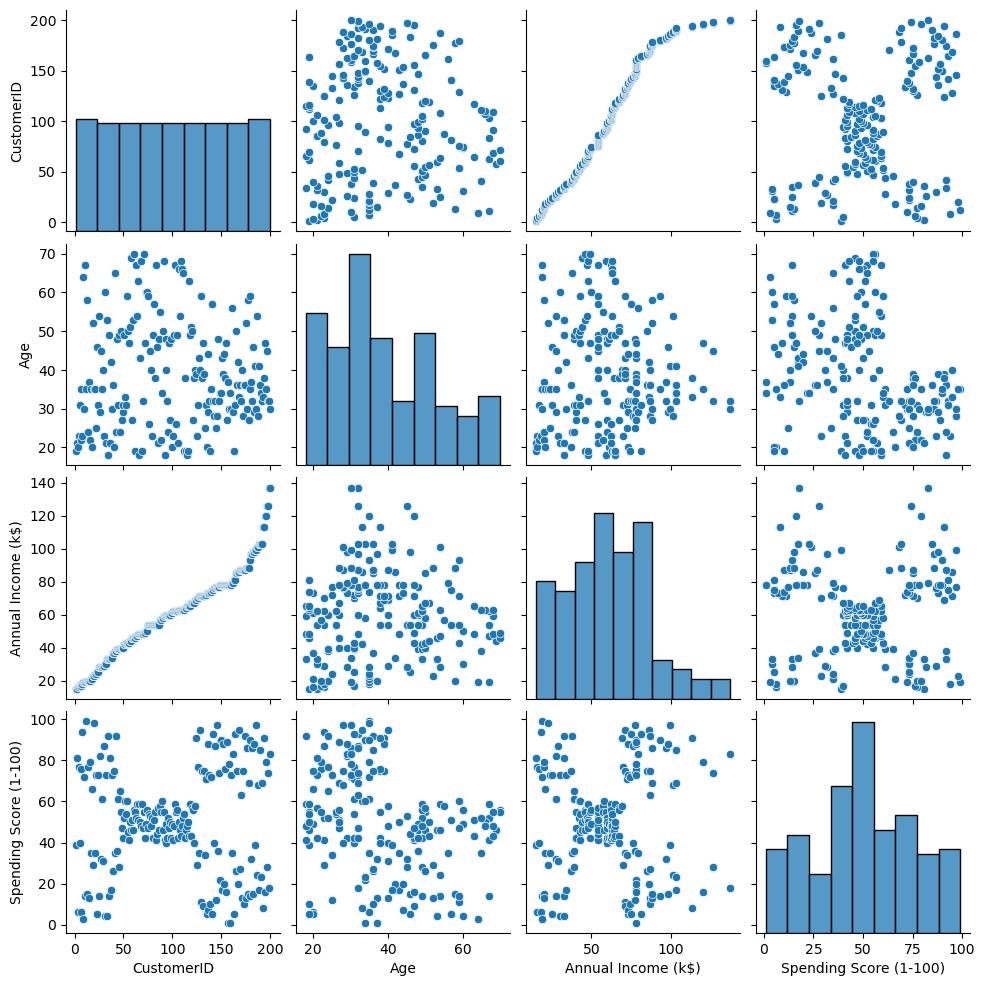

In [18]:
sns.pairplot(data)
plt.show()

#### Distribution of Annual Income & Spending Score

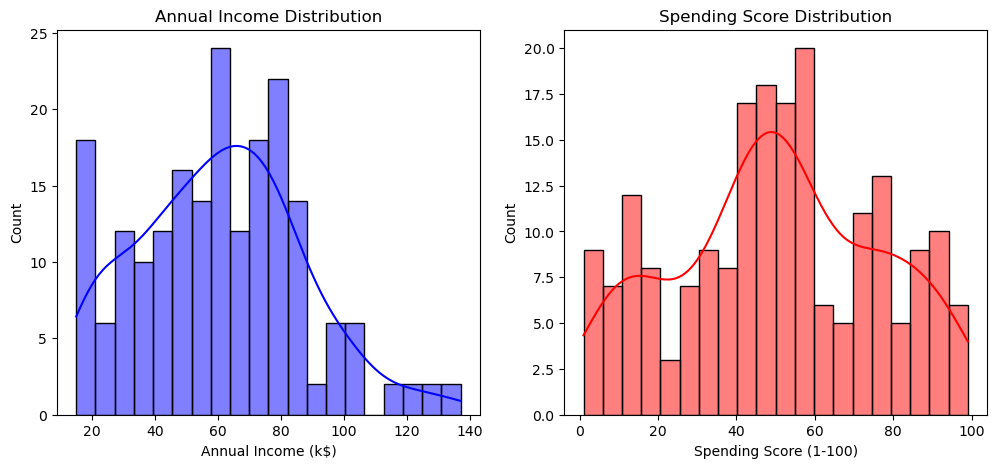

In [20]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.histplot(data['Annual Income (k$)'], kde=True, bins=20, color='blue')
plt.title('Annual Income Distribution')

plt.subplot(1, 2, 2)
sns.histplot(data['Spending Score (1-100)'], kde=True, bins=20, color='red')
plt.title('Spending Score Distribution')
plt.show()

### 3. Data Preprocessing

#### Selecting relevant features

In [23]:
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]
y = data['Genre']

#### Scaling the features

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### 4. Implementing K-Nearest Neighbors (KNN)

#### Splitting data (Assume customer segments available for classification)

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#### Initialize KNN classifier

In [30]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

#### Predicting on test data

In [32]:
y_pred = knn.predict(X_test)

### 5. Model Evaluation & Performance Improvement

#### Evaluate model performance

In [35]:
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy : {accuracy}')

print(f'Classification Report : {classification_report(y_test, y_pred)}')

Accuracy : 0.575
Classification Report :               precision    recall  f1-score   support

      Female       0.58      0.67      0.62        21
        Male       0.56      0.47      0.51        19

    accuracy                           0.57        40
   macro avg       0.57      0.57      0.57        40
weighted avg       0.57      0.57      0.57        40



#### Finding the optimal value of K

In [45]:
error_rates = []
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_k_pred = knn.predict(X_test)
    error_rates.append(np.mean(y_k_pred != y_test))

#### Plotting error rates

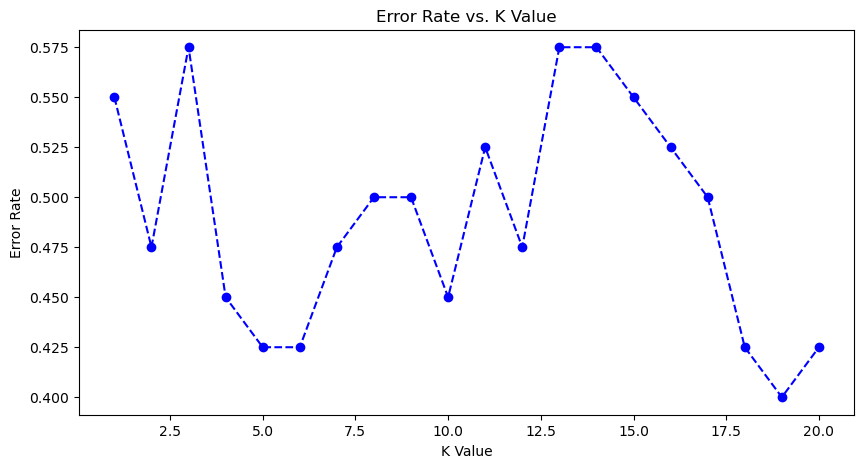

In [47]:
plt.figure(figsize=(10, 5))
plt.plot(range(1,21), error_rates, marker='o', linestyle = 'dashed', color='blue')
plt.xlabel('K Value')
plt.ylabel('Error Rate')
plt.title('Error Rate vs. K Value')
plt.show()

#### Optimal K value

In [49]:
optimal_k = np.argmin(error_rates) + 1
print(f"Optimal K value : {optimal_k}")

Optimal K value : 19


#### Retraining with optimal K

In [70]:
knn_optimal = KNeighborsClassifier(n_neighbors = optimal_k)
knn_optimal.fit(X_train, y_train)
y_optimal_pred = knn_optimal.predict(X_test)

####  Evaluate the improved model

In [76]:
optimal_accuracy = accuracy_score(y_test, y_optimal_pred)
print(f"Improved Accuracy: {optimal_accuracy}")
print(classification_report(y_test, y_optimal_pred))

Improved Accuracy: 0.6
              precision    recall  f1-score   support

      Female       0.59      0.81      0.68        21
        Male       0.64      0.37      0.47        19

    accuracy                           0.60        40
   macro avg       0.61      0.59      0.57        40
weighted avg       0.61      0.60      0.58        40



#### Visualizing Clusters (Using only 2 features for easy plotting)

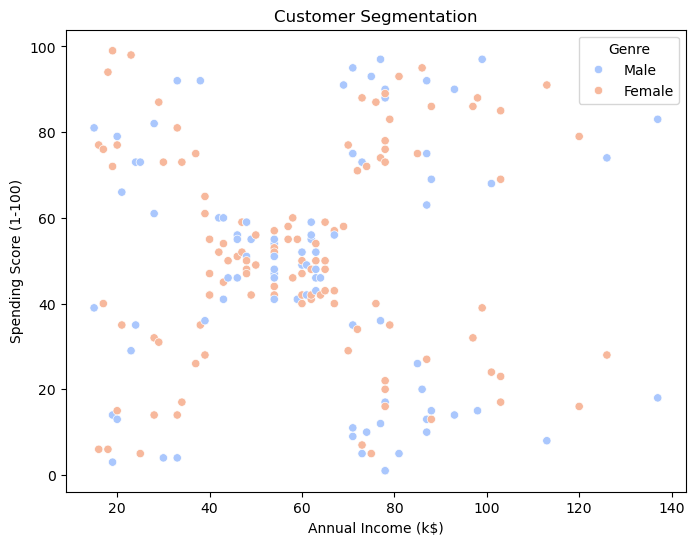

In [87]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['Annual Income (k$)'], y=data['Spending Score (1-100)'], hue=data['Genre'], palette='coolwarm')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segmentation')
plt.legend(title='Genre')
plt.show()

### 6. Final Insights & Conclusion
Key Findings: Customers can be grouped based on spending habits and income.

Performance Improvement: Optimal K value selection improved classification accuracy.

Business Impact: Helps businesses target the right customer segments for marketing.